In [1]:
import pandas as pd
import numpy as np

df = pd.read_csv("./dataset.csv")

<AxesSubplot: >

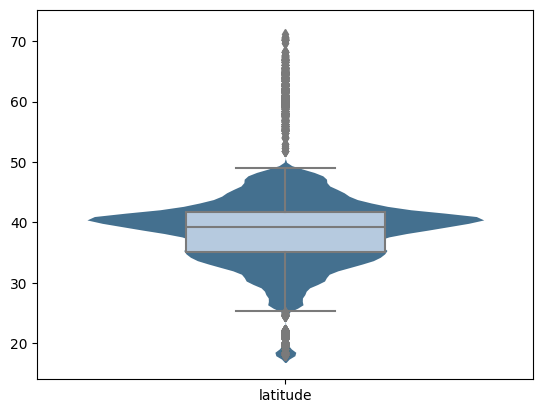

In [2]:
import seaborn as sns

# identifing outliers for latitude
ax = sns.violinplot(data=df[["latitude"]], inner=None, linewidth=0, saturation=0.5)
sns.boxplot(data=df[["latitude"]], saturation=0.5, width=0.4,
            palette='pastel', boxprops={'zorder': 2}, ax=ax)

In [3]:
# since violin plots are not 100% accurate, we are going to 
# calculate the IQR to make sure to remove the actual outliers. 
# we are gonna repeat the same thing for the longitude. 
# steps: 
# 1. Calculate the first and third quartile (Q1 and Q3).
# 2. Further, evaluate the interquartile range, IQR = Q3-Q1.
# 3. Estimate the lower bound, the lower bound = Q1*1.5
# 4. Estimate the upper bound, upper bound = Q3*1.5
# 5. Replace the data points that lie outside of the lower and the upper bound with a NULL value.

q75, q25 = np.percentile(df.loc[:, 'latitude'], [75, 25])  # step 1
intr_qr = q75 - q25  # step 2

max = q75 + (1.5 * intr_qr)  # step 3
min = q25 - (1.5 * intr_qr)  # step 4

df.loc[df['latitude'] < min, 'latitude'] = np.nan  # step 5
df.loc[df['latitude'] > max, 'latitude'] = np.nan  # step 5

df.isnull().sum()

name                0
surname             0
sex                 0
searching_sex       0
age                 0
interests           0
latitude         2547
longitude           0
dtype: int64

In [4]:
# removing all outliers from latitude column
df = df.dropna(axis=0)
df.isnull().sum()

name             0
surname          0
sex              0
searching_sex    0
age              0
interests        0
latitude         0
longitude        0
dtype: int64

<AxesSubplot: >

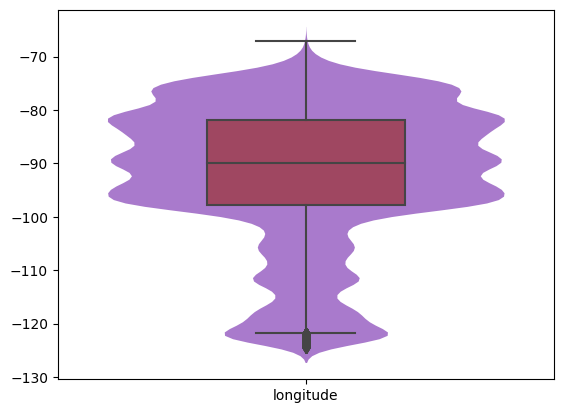

In [5]:
# identifing outliers for longitude
ax = sns.violinplot(data=df[["longitude"]], color="#af52f4", inner=None, linewidth=0, saturation=0.5)
sns.boxplot(data=df[["longitude"]], saturation=0.5, width=0.4,
            palette='rocket', boxprops={'zorder': 2}, ax=ax)

In [6]:
q75, q25 = np.percentile(df.loc[:, 'longitude'], [75, 25])  # step 1
intr_qr = q75 - q25  # step 2

max = q75 + (1.5 * intr_qr)  # step 3
min = q25 - (1.5 * intr_qr)  # step 4

df.loc[df['longitude'] < min, 'longitude'] = np.nan  # step 5
df.loc[df['longitude'] > max, 'longitude'] = np.nan  # step 5

df.isnull().sum()

name                0
surname             0
sex                 0
searching_sex       0
age                 0
interests           0
latitude            0
longitude        3532
dtype: int64

In [7]:
# removing all outliers from longitude column
df = df.dropna(axis=0)
df.isnull().sum()

name             0
surname          0
sex              0
searching_sex    0
age              0
interests        0
latitude         0
longitude        0
dtype: int64

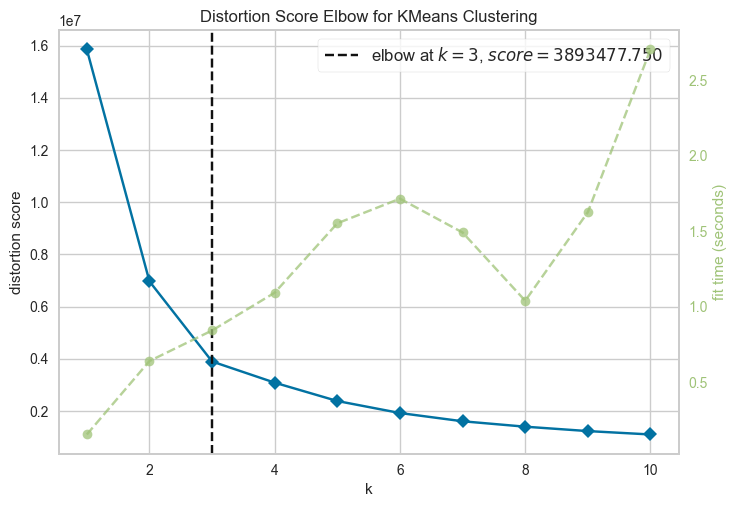

<AxesSubplot: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [8]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from yellowbrick.cluster import KElbowVisualizer
import matplotlib.pyplot as plt

# extracting latitude and longitude columns
X = df.loc[:, ['latitude', 'longitude']]

# running kmeans algorithm 10 times in order to use the 
# elbow point curve to get the right number of clutsers
# that the kmeans algorithm will generate
k_clusters = range(1, 11)
model = KMeans(init="k-means++", random_state=0, n_init=10)

visualizer = KElbowVisualizer(model, k = k_clusters, timings=True)
visualizer.fit(X)
visualizer.show()

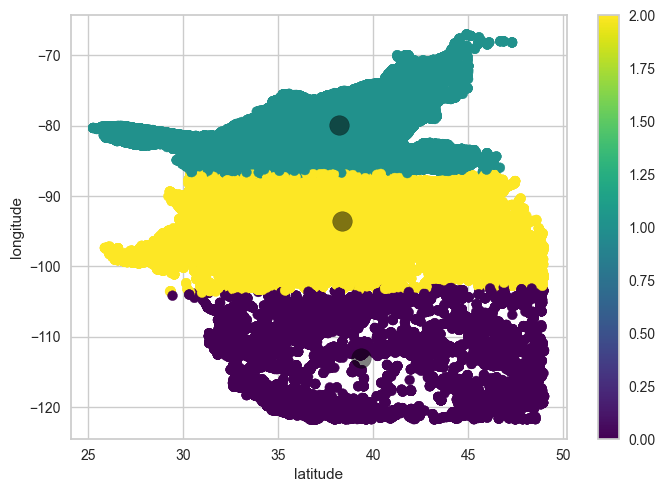

In [9]:
kmeans_instances = KMeans(n_clusters=3, init="k-means++", random_state=0, n_init=10)
kmeans_instances.fit(X[X.columns[0:2]])  # Compute k-means
X['cluster_label'] = kmeans_instances.fit_predict(X[X.columns[0:2]])
centers = kmeans_instances.cluster_centers_  # Coordinates of cluster
labels = kmeans_instances.predict(X[X.columns[0:2]])  # Labels of each point

# draw results
X.plot.scatter(x='latitude', y='longitude', c=labels, s=50, cmap='viridis')
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5)

In [10]:
# silhouette score 
k3_silhouette = silhouette_score(X, X['cluster_label'])
k3_silhouette

0.45880032238344487